# GREP: Genome for REPositioning drugs 

https://github.com/saorisakaue/GREP
https://academic.oup.com/bioinformatics/article/35/19/3821/5374757


In [4]:
%%bash
mkdir 2021_18_05.GREP
cd 2021_18_05.GREP
git clone https://github.com/saorisakaue/GREP


Cloning into 'GREP'...


In [2]:
%%bash

cd 2021_18_05.GREP
cd ./GREP
python grep.py --genelist ./example/megastroke.genes --out my_GREP_test  --test ATC --output-drug-name

/data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/2021_18_05.GREP/GREP


In [5]:
%%bash
cd 2021_18_05.GREP/GREP
python grep.py --genelist ./example/ARCHS4.genes --out ARCHS4.ATC_GREP_test  --test ATC --output-drug-name

In [6]:
%%bash
cd 2021_18_05.GREP/GREP
python grep.py --genelist ./example/ARCHS4.genes --out ARCHS4.ICD_GREP_test  --test ICD --output-drug-name

In [14]:
%%bash
cd 2021_18_05.GREP/GREP


module load R/4.0.0
R --vanilla --no-save
require(dplyr)
require(tidyverse)
require(ggplot2)
require(data.table)
require(RColorBrewer)

# FDR CORRECTION

ICD= fread("ARCHS4.ICD_GREP_test.ICD.txt", header = T)
head(ICD)
ATC= fread("ARCHS4.ATC_GREP_test.ATC.detail.txt", header = T)
head(ATC)
raw.pvalue = ICD$FisherExactP
Padj = p.adjust(raw.pvalue, method = "fdr")
table(Padj)
ICDcorrect = cbind(ICD, Padj)
head(ICDcorrect)
ICDcorrect$Cat = "ICD"

x = ICDcorrect$FisherExactP
transf = -log10(x)
transf

binded = cbind(ICDcorrect, transf)

raw.pvalue = ATC$FisherExactP
Padj = p.adjust(raw.pvalue, method = "fdr")
table(Padj)
ATCcorrect = cbind(ATC, Padj)
head(ATCcorrect)
ATCcorrect$Cat = "ATC"


x = ATCcorrect$FisherExactP
transf = -log10(x)
transf

binded2= cbind(ATCcorrect, transf)


binded3 = rbind(binded, binded2)

colnames(binded3)[1] <- c("GROUP")
head(binded3)
#write.table(binded3, "GREP.sigFDR.Results.tab", quote = F, sep = "\t", col.names = T, row.names = F)

#plot results

binded3 = filter(binded3, FisherExactP < 0.05)
bindedATC = filter(binded3, Cat == "ATC")

theme_set(theme_bw())
P1 = ggplot(data=bindedATC, aes(x=fct_reorder(GroupName, transf), y=transf, fill=GROUP)) +
  geom_bar(stat="identity") + coord_flip() + 
  theme(axis.line = element_line(colour = "black"), axis.text = element_text(size = 20),
  panel.border = element_blank(), 
  axis.title.x = element_text(size = 25),
  axis.title.y = element_text(size = 25),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  panel.background = element_blank(), legend.position = "none") +
  scale_fill_manual(values = c("grey80", "grey80", "grey80", "grey80", "grey80", "grey80", '#859dab')) +
  xlab("ATC codes") + ylab("-log(10) P-value")

#ggsave(filename = "/data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/Merged.toPLOT.LOCAL.2021-04-11.GRS/ATC.GREP2.png", width = 40, height = 20, dpi = 300, units = "cm", plot = P1) 




binded3 = filter(binded3, FisherExactP < 0.05)
bindedICD = filter(binded3, Cat == "ICD")


P1 = ggplot(data=bindedICD, aes(x=fct_reorder(GroupName, transf), y=transf, fill=GROUP)) +
  geom_bar(stat="identity") + coord_flip() + 
  theme(axis.line = element_line(colour = "black"), axis.text = element_text(size = 30),
  panel.border = element_blank(), 
  axis.title.x = element_text(size = 35),
  axis.title.y = element_text(size = 35),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  panel.background = element_blank(), legend.position = "none") +
  scale_fill_manual(values = c("grey80", "grey80","grey80", '#9ccdc7', "grey80", "grey80", "grey80","grey80", "grey80",  "grey80", "grey80", "grey80", "grey80", "hotpink3","grey80", "grey80", "grey80", "grey80", "grey80")) +
  xlab("ICD codes") + ylab("-log(10) P-value")

#ggsave(filename = "/data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/Merged.toPLOT.LOCAL.2021-04-11.GRS/ICD.GREP2.png", width = 80, height = 30, dpi = 300, units = "cm", plot = P1) 

#### Done in R locally
#### Drugmonizome access the website
library("ggsci")
library("ggplot2")
library("gridExtra")
library(data.table)
library(tidyverse)
library("scales")
library('cowplot')


show_col(pal_npg("nrc")(10))
sara = pal_npg("nrc")(3)
data = fread("GREP.csv", header = T)
head(data)
sara = c('#4B878BFF','white','red')
##CE4A7EFF'
data = filter(data, OverlapSize != "1")
data = filter (data, Bon.Value < 0.05)
head(data)


data2 = filter(data, Dataset == "SIDER")
p1 =data2 %>%
  arrange(transf.bon) %>%    # First sort by val. This sort the dataframe but NOT the factor levels
  mutate(name=factor(Term, levels=Term)) %>%   # This trick update the factor levels
  ggplot( aes(x=name, y=transf.bon)) +
  geom_segment( aes(xend=name, yend=0), color = '#e09fb0') + 
  geom_point( size=4, color = '#e09fb0') +
  coord_flip() +
  ylab("Pvalue (-log10)") +  ggtitle("SIDER indication") + xlab(NULL) +
  theme(axis.line = element_line(colour = "black"), axis.text = element_text(size = 15),
        panel.border = element_blank(), 
        axis.title.x = element_text(size = 15),
        axis.title.y = element_text(size = 15),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        legend.position = "none",
        plot.title = element_text(color='#66303e', size=25))


data = filter(data, OverlapSize != "1")
data2 = filter(data, Dataset == "Drugbank")
p2 =data2 %>%
  arrange(transf.bon) %>%    # First sort by val. This sort the dataframe but NOT the factor levels
  mutate(name=factor(Term, levels=Term)) %>%   # This trick update the factor levels
  ggplot( aes(x=name, y=transf.bon)) +
  geom_segment( aes(xend=name, yend=0), color = '#859dab') + 
  geom_point( size=4, color = '#859dab') +
  coord_flip() +
  ylab("Pvalue (-log10)") +  ggtitle("Drugbank target") + xlab(NULL) +
  theme(axis.line = element_line(colour = "black"), axis.text = element_text(size = 15),
        panel.border = element_blank(), 
        axis.title.x = element_text(size = 15),
        axis.title.y = element_text(size = 15),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        legend.position = "none",
        plot.title = element_text(color='#415c6c', size=25))



data = fread("GREP.csv", header = T)
data = filter(data, OverlapSize != "1")
data2 = filter(data, Dataset == "DrugRepurposingHub")
p3 =data2 %>%
  arrange(transf.bon) %>%    # First sort by val. This sort the dataframe but NOT the factor levels
  mutate(name=factor(Term, levels=Term)) %>%   # This trick update the factor levels
  ggplot( aes(x=name, y=transf.bon)) +
  geom_segment( aes(xend=name, yend=0), color = '#9ccdc7') + 
  geom_point(size=4, color = '#9ccdc7') +
  coord_flip() +
  ylab("Pvalue (-log10)") +  ggtitle("Drug Repurposing Hub MOA") + xlab(NULL) +
  theme(axis.line = element_line(colour = "black"), axis.text = element_text(size = 15),
        panel.border = element_blank(), 
        axis.title.x = element_text(size = 15),
        axis.title.y = element_text(size = 15),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        legend.position = "none",
        plot.title = element_text(color='#446e69', size=25))

plot_grid(p1, p2, p3, labels = c('A', 'B', 'C'), label_size = 14)



[+] Loading gcc  9.2.0  ... 
[+] Loading GSL 2.6 for GCC 9.2.0 ...
[-] Unloading gcc  9.2.0  ... 
[+] Loading gcc  9.2.0  ... 
[+] Loading openmpi 3.1.4  for GCC 9.2.0 
[+] Loading ImageMagick  7.0.8  on cn1001 
[+] Loading HDF5  1.10.4 
[-] Unloading gcc  9.2.0  ... 
[+] Loading gcc  9.2.0  ... 
[+] Loading NetCDF 4.7.4_gcc9.2.0 
[+] Loading pandoc  2.17.1.1  on cn1001 
[+] Loading pcre2 10.21  ... 
[+] Loading R 4.0.0 



R version 4.0.0 (2020-04-24) -- "Arbor Day"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> require(dplyr)


Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
package ‘dplyr’ was built under R version 4.0.3 


> require(tidyverse)


Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.0
✔ readr   2.1.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning messages:
1: package ‘ggplot2’ was built under R version 4.0.3 
2: package ‘tibble’ was built under R version 4.0.3 
3: package ‘tidyr’ was built under R version 4.0.5 
4: package ‘readr’ was built under R version 4.0.3 


> require(ggplot2)
> require(data.table)


Loading required package: data.table

Attaching package: ‘data.table’

The following object is masked from ‘package:purrr’:

    transpose

The following objects are masked from ‘package:dplyr’:

    between, first, last

Warning message:
package ‘data.table’ was built under R version 4.0.3 


> require(RColorBrewer)


Loading required package: RColorBrewer


> 
> # FDR CORRECTION
> 
> ICD= fread("ARCHS4.ICD_GREP_test.ICD.txt", header = T)
> head(ICD)
    #Group                                                   GroupName
1: A00-A09                              Intestinal infectious diseases
2: A15-A19                                                Tuberculosis
3: A20-A28                         Certain zoonotic bacterial diseases
4: A30-A49                                    Other bacterial diseases
5: A50-A64 Infections with a predominantly sexual mode of transmission
6: A65-A69                                 Other spirochaetal diseases
   OddsRatio FisherExactP
1: 1.9791883    0.2153508
2: 0.9943503    0.6426743
3: 1.0892256    0.6102106
4: 0.7253788    0.7526084
5: 0.9607551    0.6549112
6: 1.0892256    0.6102106
                                                            TargetGene:DrugNames
1: CHRM1:atropine,clidinium;CHRM4:atropine,ispaghula,mebeverine;KCNQ2:diclofenac
2:                                                              K


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



> library(data.table)
> library(tidyverse)
> library("scales")



Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



> library('cowplot')
> 
> 
> show_col(pal_npg("nrc")(10))
> sara = pal_npg("nrc")(3)
> data = fread("GREP.csv", header = T)
> head(data)
                   Term Association Type     P-Value OddsRatio OverlapSize
1:              Tension       Indication 3.58000e-08  37.40000           7
2:     Anxiety disorder       Indication 1.82000e-06  79.16883           4
3:              Anxiety       Indication 6.16000e-05  16.89773           5
4:             Insomnia       Indication 6.80000e-05  16.51111           5
5:   Status epilepticus       Indication 1.99668e-04  38.02500           3
6: Grand mal convulsion       Indication 2.52639e-04  34.54545           3
     BH.Qvalue   Bon.Value
1: 0.000001390 0.000001390
2: 0.000035600 0.000071200
3: 0.000663223 0.002400811
4: 0.000663223 0.002652891
5: 0.001557409 0.007787045
6: 0.001642154 0.009852925
                                                                    Overlap
1: topiramate;oxazepam;pilocarpine;doxepin;lorazepam;alprazolam;meprobama

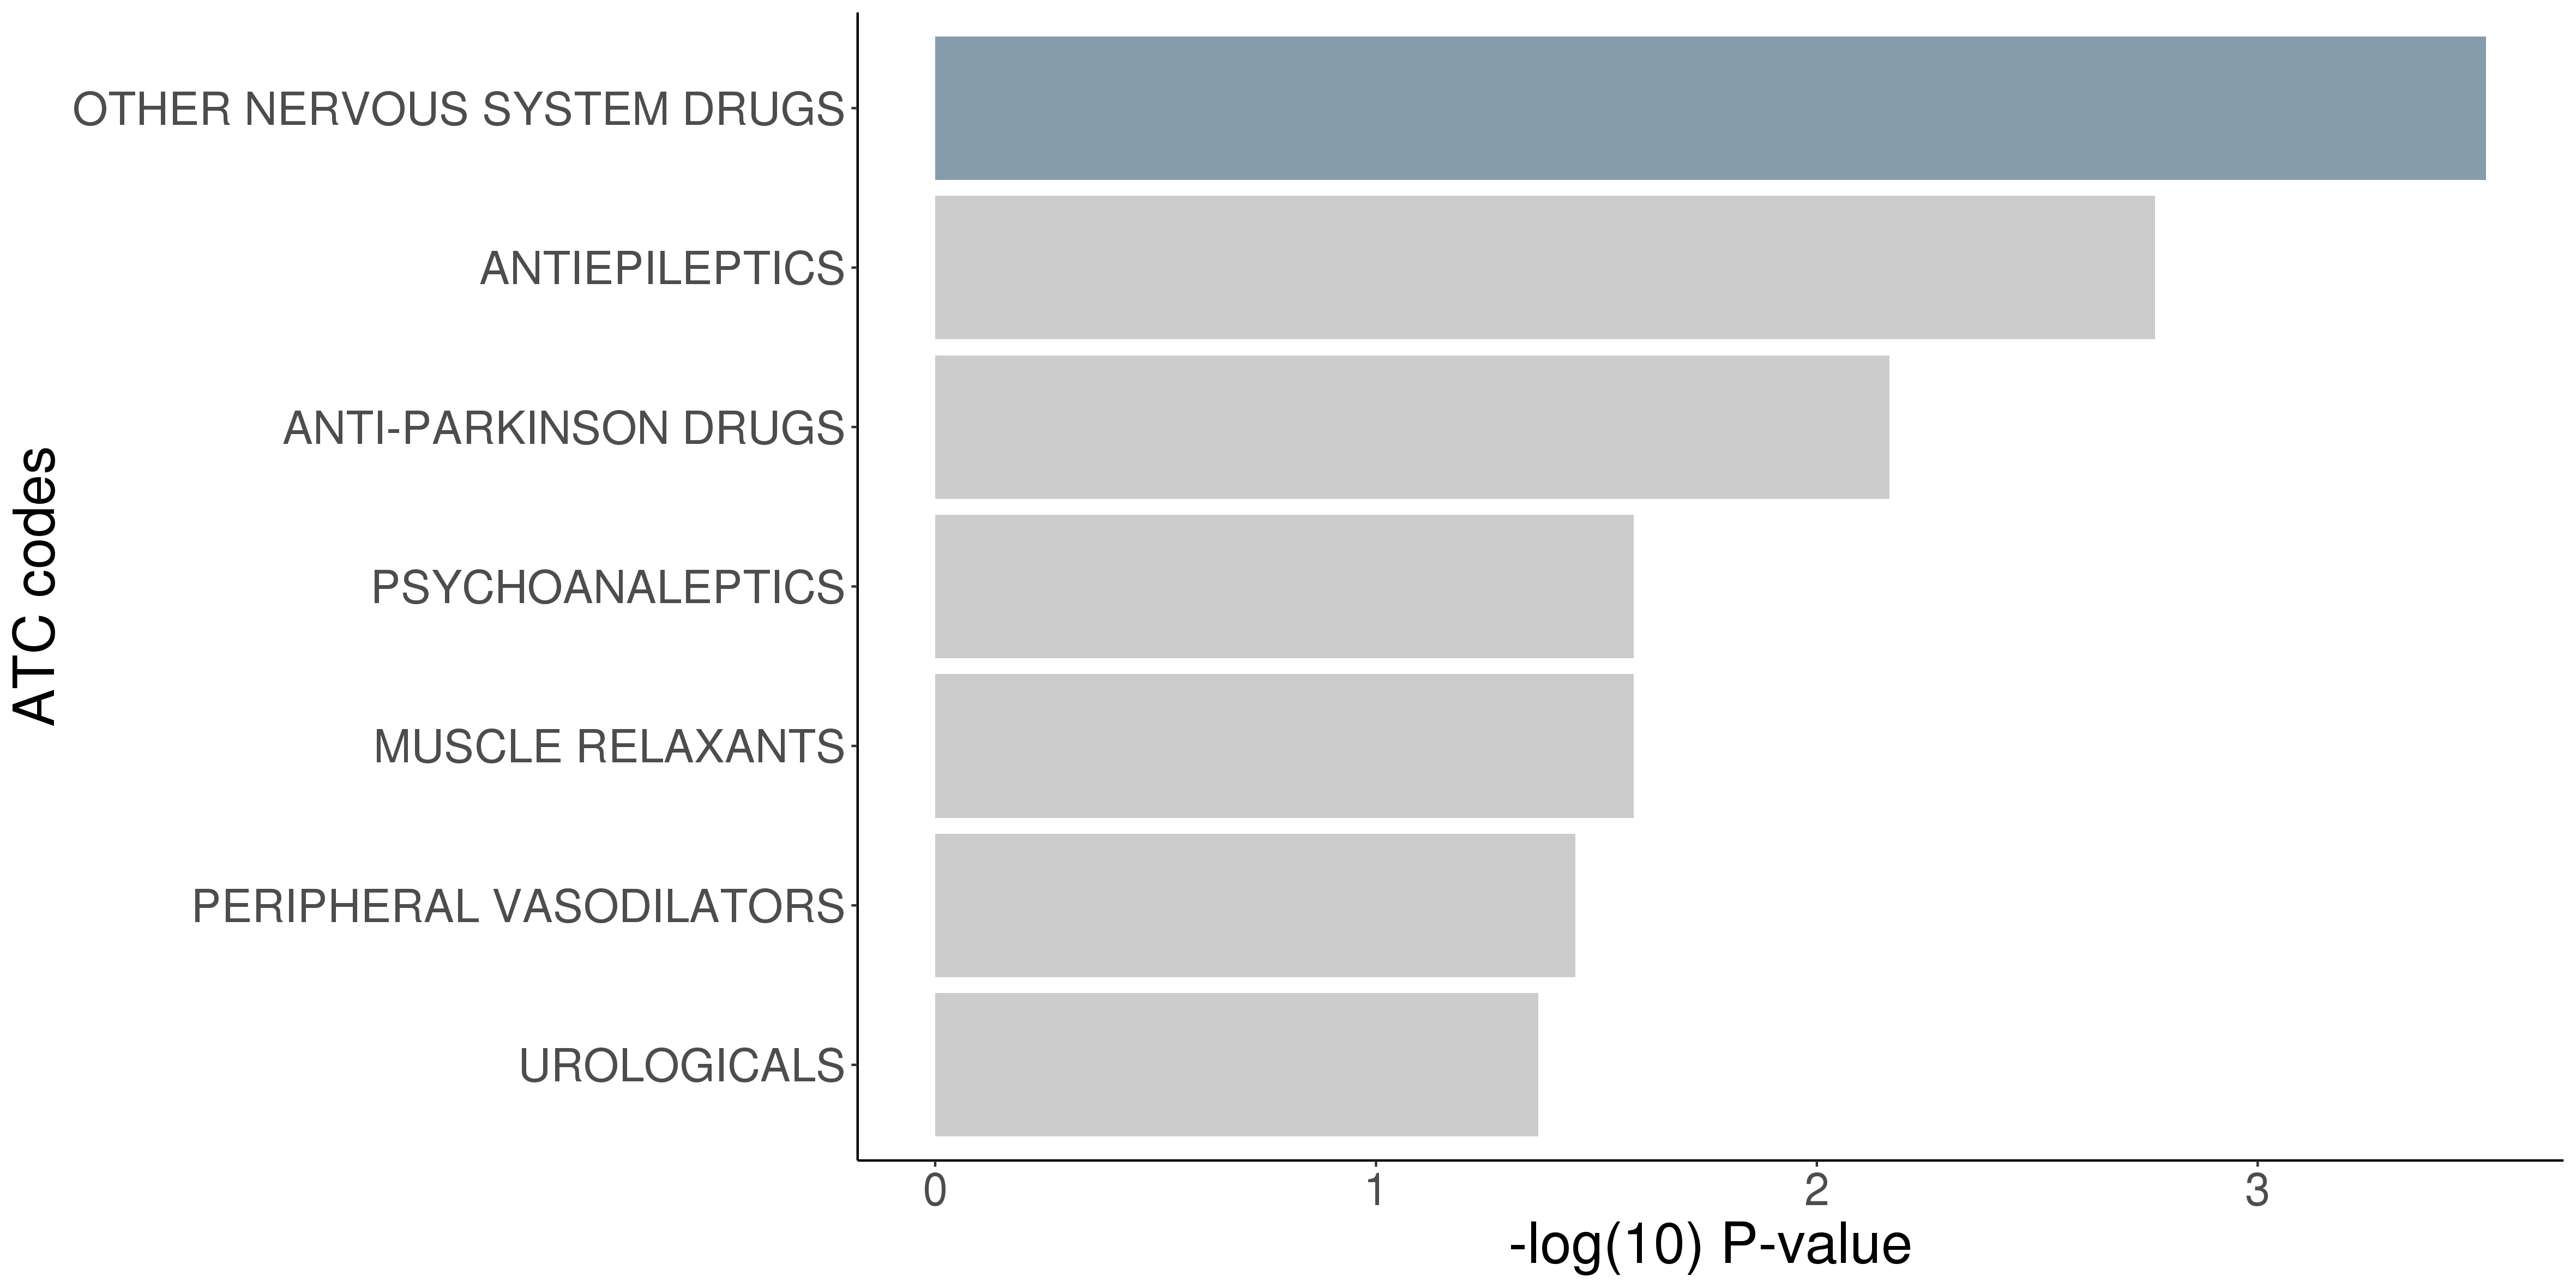

In [11]:

from IPython.display import Image
Image(filename="/data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/Merged.toPLOT.LOCAL.2021-04-11.GRS/ATC.GREP2.png")



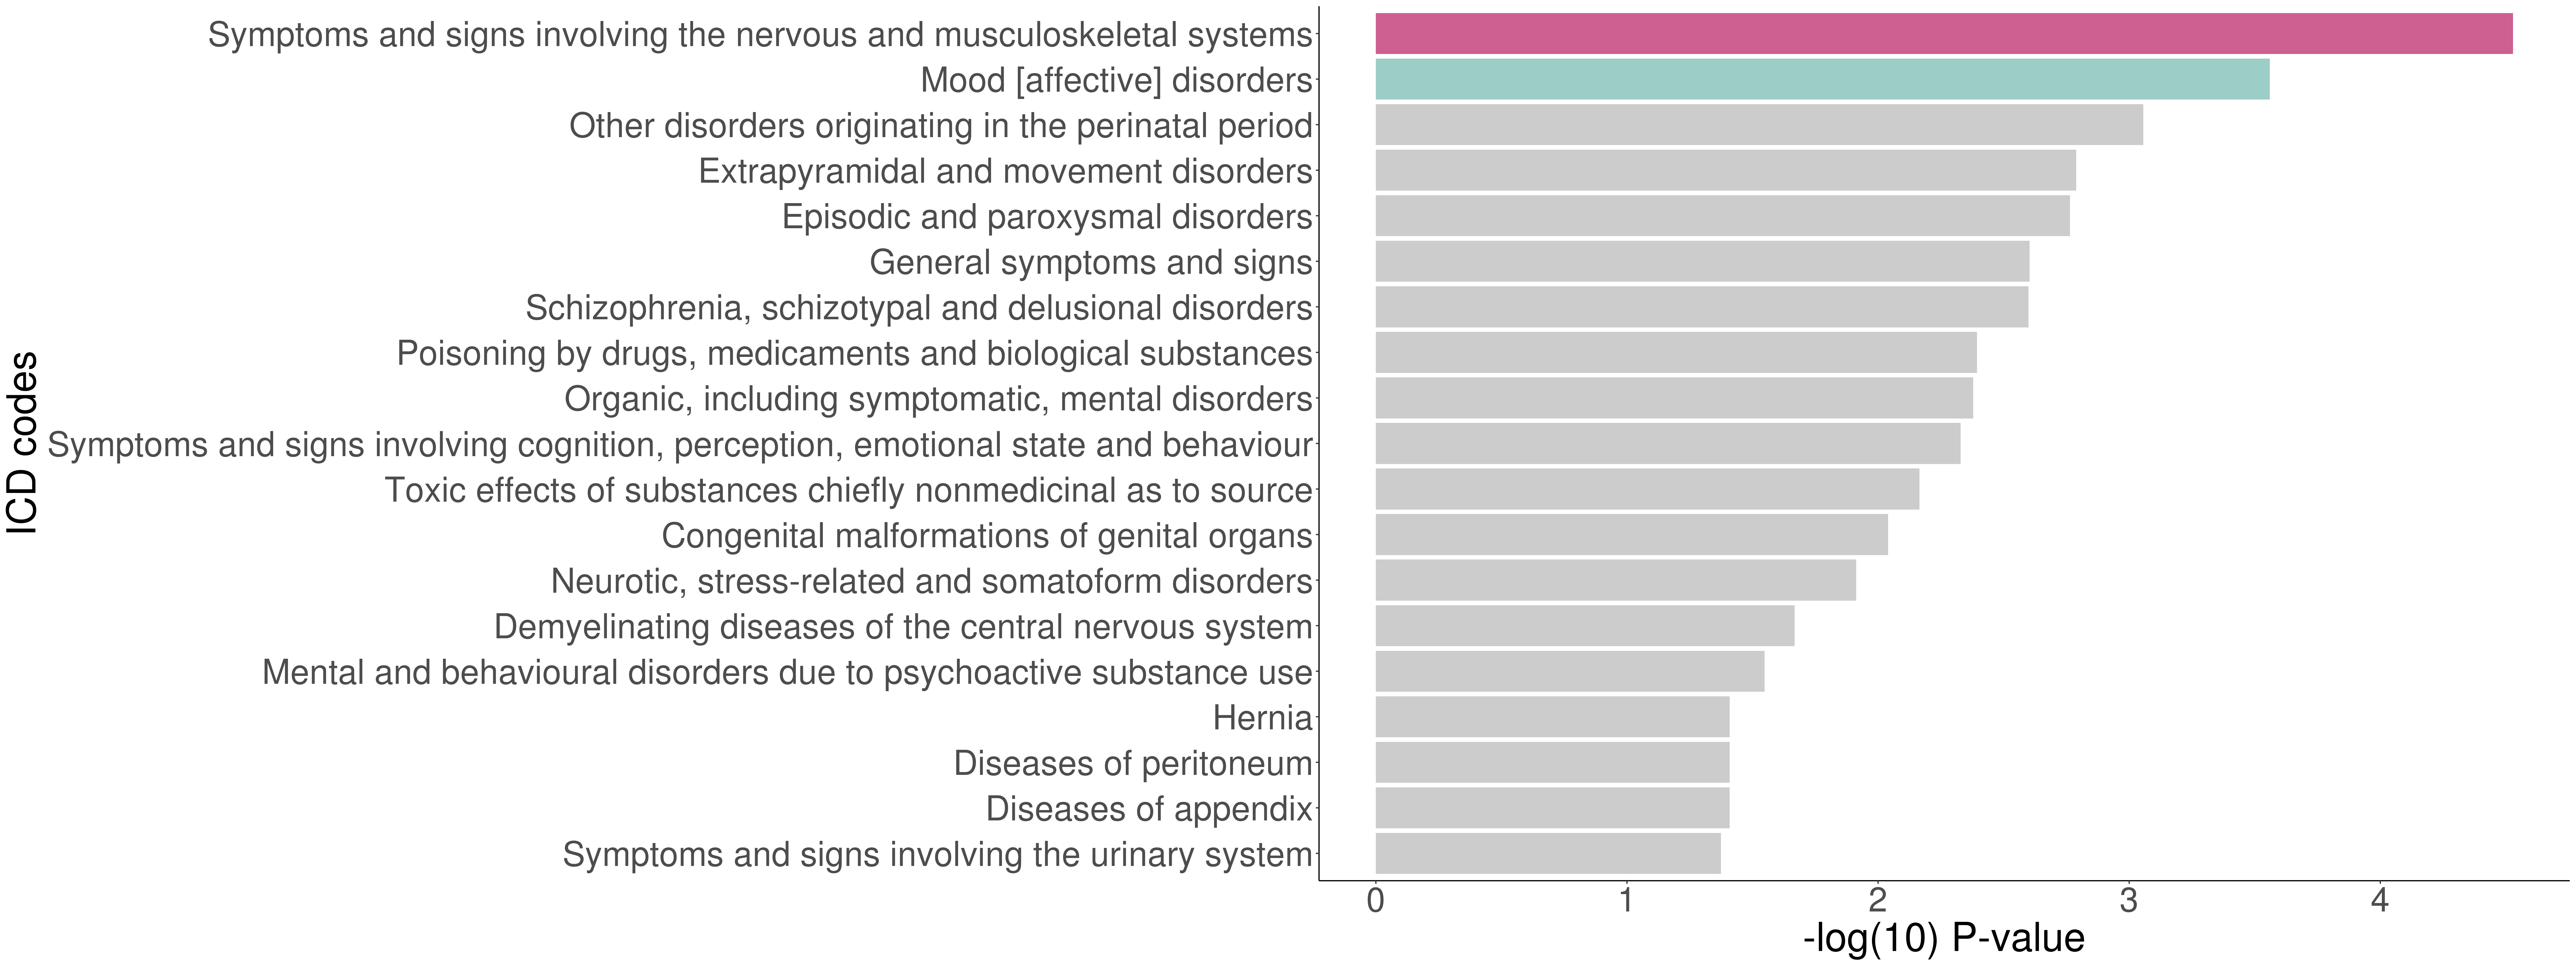

In [141]:
from IPython.display import Image
Image(filename="/data/ALS_50k/SaraSaez_ALS/PROJECT2_C9_AAO/Merged.toPLOT.LOCAL.2021-04-11.GRS/ICD.GREP.png")

